


### **Importing Dataset**




In [1]:
#importing necessary libraries

import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pickle
import pandas as pd
import numpy as np
import random

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Clonning the repository containing Traffic sign dataset
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [3]:
#Lists Datasets contents

!ls german-traffic-signs/

signnames.csv  test.p  train.p	valid.p


In [4]:
#Loadin the dataset
data = pd.read_csv('german-traffic-signs/signnames.csv')

In [5]:
#Viewving the data
data

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [6]:
#Loading pickled data
with open("german-traffic-signs/train.p", mode='rb') as training:
  train = pickle.load(training)


with open("german-traffic-signs/valid.p", mode='rb') as validation:
  valid = pickle.load(validation)

with open("german-traffic-signs/test.p", mode='rb') as testing:
  test = pickle.load(testing)


In [7]:
#Splitting the features and labels of Training, Testing and validatiing the datasets in key value pairs
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [8]:
#printing the shape of train, test and validation:
print (X_train.shape)
print (X_validation.shape)
print (X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


Image Label=35


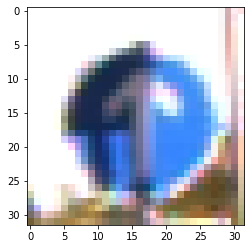

In [9]:
#Image visualisation
index = np.random.randint(1,len(X_train)) #selecting random number 
plt.imshow(X_train[index]) #for visualising the image
print("Image Label={}".format(y_train[index]))

### Image Pre-processing

1, converting to grayscale
2, Histogram Equialisation
3, Normalisation

In [10]:
# shuffle the data
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train,y_train)

In [11]:
def preprocessing (img):
  # 1. converting to grey scale images
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # 2. Histogram Equalization
  img = cv2.equalizeHist(img)
  # 3. Normalization
  img = img/255
  return img

In [12]:
#Mapping of preprocessing into train, test and validation data
X_train_preprocessed = np.array(list(map(preprocessing,X_train)))
X_valid_preprocessed = np.array(list(map(preprocessing,X_validation)))
X_test_preprocessed = np.array(list(map(preprocessing, X_test)))

In [13]:
#Reshaping pre-processed images of train, test and validation
X_train_preprocessed = X_train_preprocessed.reshape(34799, 32, 32, 1)
X_valid_preprocessed = X_valid_preprocessed.reshape(4410, 32, 32, 1)
X_test_preprocessed = X_test_preprocessed.reshape(12630, 32, 32, 1)

In [14]:
#Printing the shape of image
print(X_train_preprocessed.shape)
print(X_valid_preprocessed.shape)
print(X_test_preprocessed.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


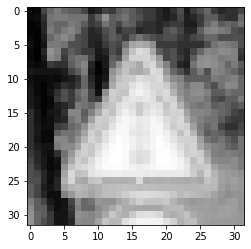

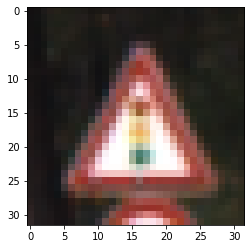

In [15]:
#Plotting the images of train data and preprocessed trained data
i = random.randint(1,len(X_train))
plt.imshow(X_train_preprocessed[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_train[i].squeeze())

In [16]:

model = Sequential()
#add convolutional layer
#filter, size of filters, input_shape, activation_function
model.add(Conv2D(32,(5,5),activation="relu", input_shape=(32,32,1)))

#Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Place a dropout Layer
model.add(Dropout(0.25))

#Add another Convolutional Layer
model.add(Conv2D(64,(5,5),activation="relu"))

#Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten the image to 1 dimensional array
model.add(Flatten())

#add a dense layer: amount of nodes, activation
model.add(Dense(256,activation='relu'))

#place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
#Defining the output layer of our network
model.add(Dense(43,activation='softmax'))

model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)              

In [17]:
#Compile our model
model.compile(Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])



In [18]:
#model training
history= model.fit(X_train_preprocessed,
          y_train,
          batch_size=500,
          epochs=50,
          verbose=1,
          validation_data=(X_valid_preprocessed,y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 8s 241us/step - loss: 3.4815 - accuracy: 0.0955 - val_loss: 3.4050 - val_accuracy: 0.1422
Epoch 2/50
34799/34799 [==============================] - 1s 32us/step - loss: 3.0805 - accuracy: 0.2739 - val_loss: 2.8331 - val_accuracy: 0.3558
Epoch 3/50
34799/34799 [==============================] - 1s 32us/step - loss: 2.3035 - accuracy: 0.4369 - val_loss: 2.0616 - val_accuracy: 0.4753
Epoch 4/50
34799/34799 [==============================] - 1s 32us/step - loss: 1.7134 - accuracy: 0.5326 - val_loss: 1.6417 - val_accuracy: 0.5308
Epoch 5/50
34799/34799 [==============================] - 1s 32us/step - loss: 1.3780 - accuracy: 0.6133 - val_loss: 1.3434 - val_accuracy: 0.6224
Epoch 6/50
34799/34799 [==============================] - 1s 31us/step - loss: 1.1584 - accuracy: 0.6744 - val_loss: 1.1447 - val_accuracy: 0.6828
Epoch 7/50
34799/34799 [==============================] - 1s 32us/st

In [19]:
#Evaluate model performance
score = model.evaluate(X_test_preprocessed, y_test)
print('Test Accuracy',score[1])

12630/12630 [==============================] - 1s 68us/step
Test Accuracy 0.8946160078048706


In [20]:
#Checking the important keys
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

Text(0.5, 0, 'epochs')

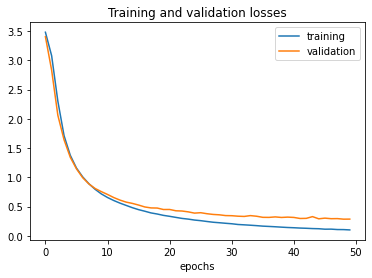

In [21]:
#Plotting the validation and training losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation losses')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

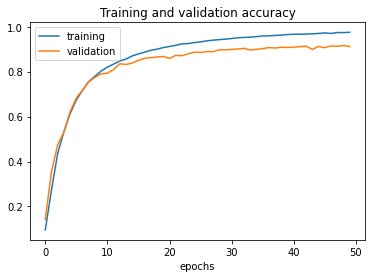

In [22]:
#Plotting the validation and training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epochs')

In [23]:
#storing predicted model inside a variable
prediction = model.predict_classes(X_test_preprocessed)
y_true_labels = y_test

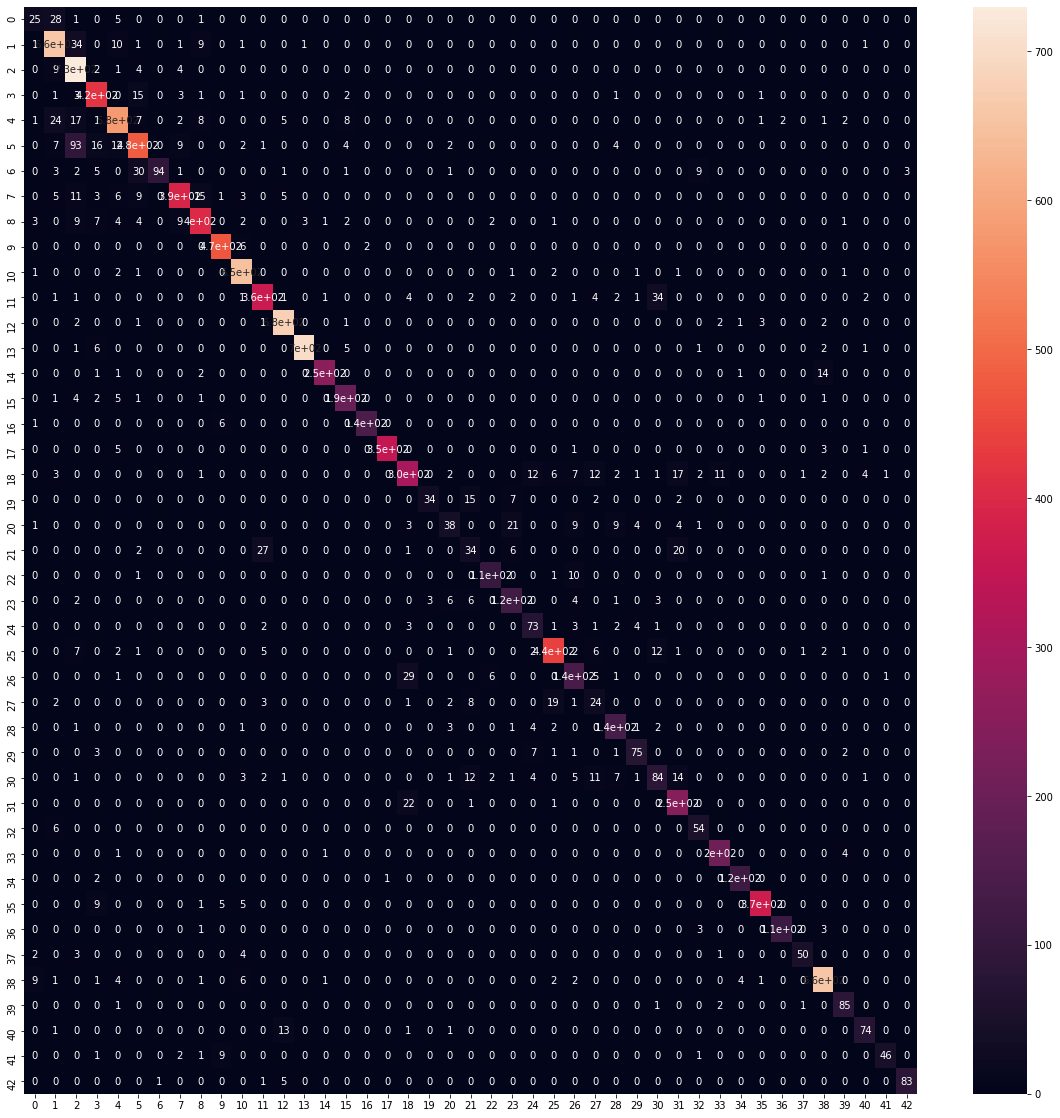

In [25]:
#Heat map visualisation of Confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_true_labels,prediction)
plt.figure(figsize=(20,20))
sns.heatmap(matrix,annot=True)

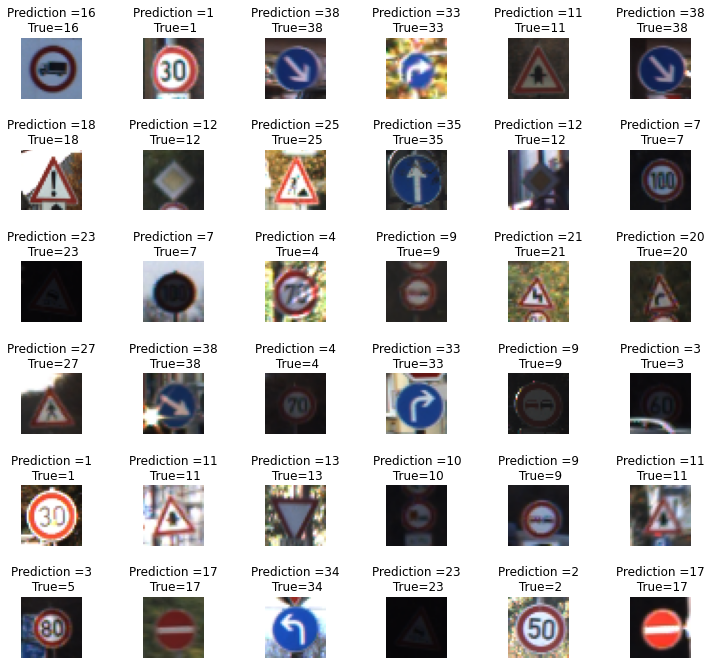

In [31]:
#Visualising the predicted and true models
L=6
W=6
fig , axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()
for i in range(0,L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction ={}\n True={}'.format(prediction[i],y_true_labels[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace=1)

In [32]:
#saving model
model.save('my_model.h5')